In [1]:
## Import the modules that we need
import numpy
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
## Define some physical constants
km_per_Mpc = 3.086e19
sec_per_yr = 3.154e7
c = 299792.458   ## Speed of light in km/s

## Define a dictionary with some default cosmological parameters
cosmo_params_default = {'H_0': 67.32, \
                'Omega_m': 0.3158, \
                'Omega_r': 9.4e-5, \
                'Omega_K': 0.0, \
                'w_de': -1}

In [3]:
## Define some functions useful for computing expansion history
## Inputs will include the dictionary of cosmological parameters as defined above

def H_of_a(a, cosmo):
    """Returns Hubble rate at a given scale factor in units of km/s/Mpc"""
    Omega_de = 1. - cosmo['Omega_m'] - cosmo['Omega_r'] - cosmo['Omega_K']
    return cosmo['H_0']*numpy.sqrt(cosmo['Omega_r']*a**(-4) + cosmo['Omega_m']*a**(-3) \
                                   + cosmo['Omega_K']*a**(-2) + Omega_de*a**(-3*(1+cosmo['w_de'])))

def t_of_a(cosmo):
    """Returns age of universe at a given scale factor in years"""
    a_array = numpy.geomspace(1.0e-10, 1, num=1000)
    t_of_a_array = numpy.cumsum(numpy.diff(a_array) / ( a_array[1:] * H_of_a(a_array[1:], cosmo) ) ) \
                *km_per_Mpc/sec_per_yr
    return scipy.interpolate.interp1d(a_array[1:], t_of_a_array, kind = 'cubic')

def tau_of_a(cosmo):
    """Returns conformal time at given scale factor in Mpc"""
    a_array = numpy.geomspace(1.0e-10, 1, num=1000)
    tau_of_a_array = numpy.cumsum(numpy.diff(a_array) / ( a_array[1:]**2 * H_of_a(a_array[1:], cosmo) ) ) \
                *c
    return scipy.interpolate.interp1d(a_array[1:], tau_of_a_array, kind = 'cubic')

def t_of_z(z, cosmo):
    """Returns age of universe at a given redshift in years"""
    a_of_z = 1./(1.+z)
    return t_of_a(cosmo)(a_of_z)
    
def chi_of_z(z,cosmo):
    """Returns conformal radial distance to redshift z in Mpc"""
    a_of_z = 1./(1.+z)
    return tau_of_a(cosmo)(1.) - tau_of_a(cosmo)(a_of_z)

def r_of_z(z, cosmo):
    """Returns metric radial distance to redshift z in Mpc"""
    if cosmo['Omega_K']<0.:
        return numpy.sinh(chi_of_z(z,cosmo)*cosmo['H_0']/c)/cosmo['H_0']*c
    elif cosmo['Omega_K']>0.:
        return numpy.sin(chi_of_z(z,cosmo)*cosmo['H_0']/c)/cosmo['H_0']*c
    else:
        return chi_of_z(z,cosmo)
    

In [4]:
##  As an example of how to use this notebook, we will make two plots for each of two cosmologies:
##  1) Metric distance as a function of redshift
##  2) Age of universe as a function of redshift


## First, we define the range of redshifts we are interested in plotting
## For plotting convenience, we will sample the range at 200 equally spaced redshifts
zs = numpy.arange(0., 2., 0.01)


## Now we define dictionaries of cosmological parameters for two cosmologies using the format above
cosmo_params_flat = {'H_0': 67.32, \
                'Omega_m': 0.3158, \
                'Omega_r': 9.4e-5, \
                'Omega_K': 0.0, \
                'w_de': -1}

cosmo_params_open = {'H_0': 67.32, \
                'Omega_m': 0.3158, \
                'Omega_r': 9.4e-5, \
                'Omega_K': 0.68, \
                'w_de': -1}


##  We now calculate the metric distance at the redshifts of interest for the two cosmologies
flat_metric_distance = r_of_z(zs, cosmo_params_flat)
open_metric_distance = r_of_z(zs, cosmo_params_open)

##  We do the same for the age as a function of redshift
flat_age = t_of_z(zs, cosmo_params_flat)
open_age = t_of_z(zs, cosmo_params_open)

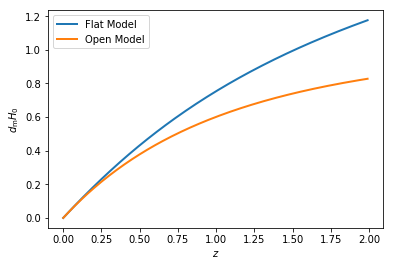

In [5]:
#Plot d_m*H_0 / c versus redshift for two different cosmologies
plt.figure('Metric Distance')
plt.clf()
plt.plot(zs, flat_metric_distance*cosmo_params_flat['H_0']/c, lw = 2, label = 'Flat Model')
plt.plot(zs, open_metric_distance*cosmo_params_open['H_0']/c, lw = 2, label = 'Open Model')
plt.xlabel(r'$z$')
plt.ylabel(r'$d_\mathrm{m}H_0$')
plt.legend()
plt.show()

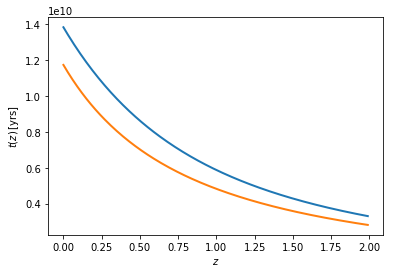

In [6]:
#Plot age versus redshift for two different cosmologies
plt.figure('Age')
plt.clf()
plt.plot(zs, flat_age, lw = 2, label = 'Flat Model')
plt.plot(zs, open_age, lw = 2, label = 'Open Model')
plt.xlabel(r'$z$')
plt.ylabel(r'$t(z)\, [\mathrm{yrs}]$')
plt.show()